In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('VF Test.csv', header=0, index_col=0)
df = pd.DataFrame(series)
df.describe()

,PCT
count,287.000000
mean,0.010886
std,0.162673
min,-0.713433
25%,-0.072470
50%,-0.004668
75%,0.076119
max,0.680486


**LINE PLOT**

                       PCT
DateTime                  
05/08/2021 00:00       NaN
06/08/2021 00:00  0.775963
07/08/2021 00:00  0.315676
15/09/2021 00:00 -0.211842
16/09/2021 00:00 -0.023545


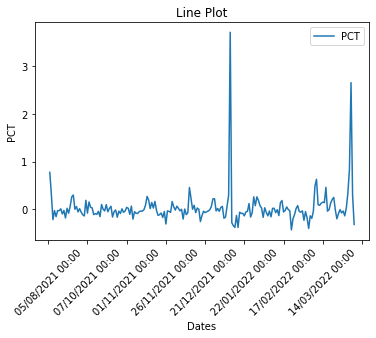

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('VF Test.csv', header=0, index_col=0)
print(series.head())
series.plot(rot=45)
pyplot.title('Line Plot')
pyplot.xlabel('Dates')
pyplot.ylabel('PCT')
pyplot.show()

**CHECK FOR AUTOCORRELATION**

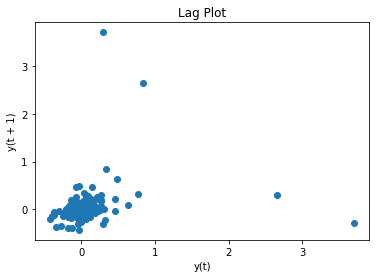

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('VF Test.csv', header=0, index_col=0)
lag_plot(series)
pyplot.title('Lag Plot')
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('VF Test.csv', header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.191629
t+1  0.191629  1.000000


**AUTOCORRELATION PLOTS**

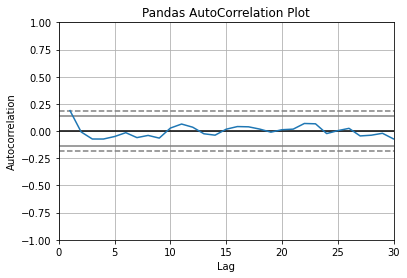

In [ ]:
from pandas import read_csv
from matplotlib import pyplot 
from pandas.plotting import autocorrelation_plot
series = read_csv('VF Test.csv', header=0, index_col=0)
series.iloc[0] = 0
ax = autocorrelation_plot(series)
ax.set_xlim([0, 30])
pyplot.title('Pandas AutoCorrelation Plot')
pyplot.show()

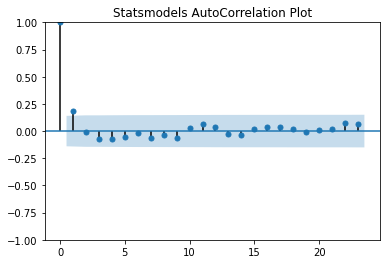

In [ ]:
# Autocorrelation Plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('VF Test.csv', header=0, index_col=0)
series.iloc[0] = 0 
plot_acf(series)
pyplot.title('Statsmodels AutoCorrelation Plot')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


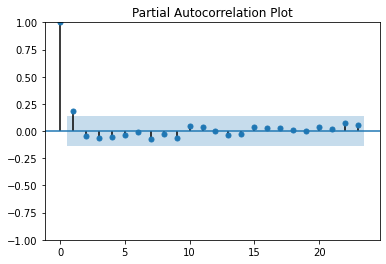

In [ ]:
# Partial Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_pacf
series.iloc[0] = 0  
plot_pacf(series)
pyplot.title('Partial Autocorrelation Plot')
pyplot.show()

**PERSISTENCE MODEL**

Test MSE: 1.368


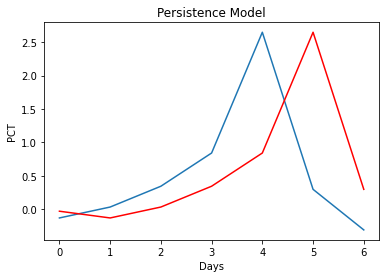

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('VF Test.csv', header=0, index_col=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.title('Persistence Model')
pyplot.xlabel('Days')
pyplot.ylabel('PCT')
pyplot.show()

**AUTOREGRESSION MODEL**

Coefficients: [ 0.01812556  0.08213929 -0.02786429 -0.08175689 -0.06031698 -0.06067623
 -0.00883104 -0.08350029 -0.03337686 -0.08187683  0.01961878  0.01731541
 -0.00466227 -0.05819601 -0.08083082  0.01122891 -0.04152772  0.01025356
 -0.00443635 -0.04088592 -0.00250906 -0.02515827 -0.01395634  0.01325566
 -0.01706551  0.0491186   0.07158484 -0.01611343 -0.01406517  0.00427917]
predicted=-0.064204, expected=-0.133038
predicted=-0.063227, expected=0.030596
predicted=-0.060122, expected=0.342442
predicted=-0.003691, expected=0.840276
predicted=0.007668, expected=2.650684
predicted=0.004378, expected=0.295879
predicted=-0.001172, expected=-0.312419
Test RMSE: 1.073


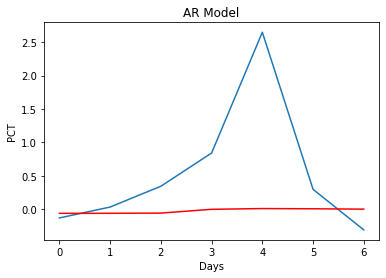

In [ ]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('VF Test.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.xlabel('Days')
pyplot.ylabel('PCT')
pyplot.title('AR Model')
pyplot.show()

predicted=-0.064204, expected=-0.133038
predicted=-0.068880, expected=0.030596
predicted=-0.050497, expected=0.342442
predicted=0.032389, expected=0.840276
predicted=0.062254, expected=2.650684
predicted=0.163562, expected=0.295879
predicted=-0.149240, expected=-0.312419
Test RMSE: 1.040


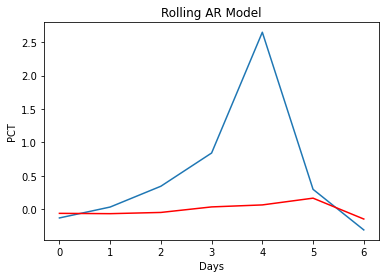

In [ ]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('VF Test.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.xlabel('Days')
pyplot.ylabel('PCT')
pyplot.title('Rolling AR Model')
pyplot.show()